## Checklist
*Fill this table appropriately as you progress in your tasks:*


|**Section**|**Completion**|
|-|-|
|**Section 1**| **Completed** |
|  Q 1 | Completed |
|  Q 2 | Completed |
|  Q 3 | Completed |
|  Q 4 | Completed |
|  Q 5 | Completed |
|**Section 2**| **Completed** |
|  Q 1 | Completed |
|  Q 2 | Completed |
|  Q 3 | Completed |
|  Q 4 | Completed |
|  Q 5 | Completed |

---
<font color='red'>**PLEASE READ THIS CAREFULLY**</font><br>
In this assignment you will be asked to solve the problems presented to you, and then create a PDF or maybe a powerpoint presentation, or maybe even a text file with your thoughts on a certain topic. And definitely a .ipynb file or some .py files.<br><br>
All of these files should be <font color='cyan'>***uploaded into a folder in Google Drive***</font> and made <font color='cyan'>***publicly accessible***</font> so that we can view your work without any form of back and forth requesting access.<br>
<font color='brown'>***Reminder***</font> : You need to make each file you upload publicly accessible, not just the folder. After uploading do check that all files are accessible and openable as intended.

---
# Introduction

Welcome! As a budding Data Scientist, you've been entrusted with the exciting opportunity to dive into the realms of Data Science and unravel valuable insights that will steer our organization towards success. Your efforts have the power to shape decision-making processes and position you as a key player in our team.

We're committed to providing everyone with an equal chance to showcase their talents. This guided assignment is designed not only to evaluate your fit within our dynamic team but also to help you grasp the type of impactful work you'll be contributing to as an intern.  We're confident that, with your hard work, you'll not only meet but exceed expectations. Let's get started! &#x1F4AA;

This is a practical exercise that will test your analytical & programming skills as well as your understanding of various components of the analytics life cycle. **You would be required to share an iPython notebook (`.ipynb` format) and a Presentation document (`.pptx` format) uploaded to a folder in Google drive and shared as a "Google Drive link" which has viewer access to everyone.**

**Note:** You will not be able to edit this file directly, so make a copy of it on your local machine or in Google Colab beforing answering different sections of this assessment.

The final notebook shouldn't have the questions, it should only have appropriate headings for each section/sub-section and the questions should be correctly numbered.

---
# Instructions
Please read carefully:
- **Submit 1 Google drive link with all the answers. The submitted Google Colab notebook/PPT's name should be in `<your_full_name>_<date_of_submission>` format.**
- **Your code, comments & output should be present in the colab notebook. Please make sure that all the output code and text are organized and readable in the submitted Google Colab notebook.**
- You may not consult with any other person regarding the test. You are allowed to use internet searches, AI chatbots, books, or notes you have on hand.
- **The test has 2 sections, both of which are mandatory.** Read the questions carefully and answer accordingly. **Code should be commented properly.**

- In case of doubts please make thoughtful assumptions.

**Start your Google Colab notebook with a checklist mentioning the parts you were/were not able to complete.** The table to fill is given at the top. Ideally, all sections must be marked "Completed".


---
<h1> About Data</h1>

Analysing data and getting actionable insights is one of the very basic but key tasks of any data professional. For the purpose of this assessment, you have been provided with the data. The data for this section can be accessed from [Assignment Data Excel Sheet](https://docs.google.com/spreadsheets/d/1T9eggrYyjM9g7KrSwNMchw9NEJUbOgJV/edit?usp=sharing&ouid=107859560415035863900&rtpof=true&sd=true) (click on the hyperlink and download the dataset).

The Microsoft excel file shared with you has 3 sheets:
1. `WorkerFunnel` sheet
2. `creditcard` sheet
3. `creditcard_test` sheet

**NOTE:** Download the `AssignmentData.xlsx` to your current directory accordingly. Don't make any changes to the data using excel, all data manipulations must be done within this notebook only and your codes must run on the original data file provided to you.

# Section 1 - Funnel Analysis
`WorkerFunnel` sheet has the details of a garment manufacturing process and the productivity of the employees at the organisation. This data allows you to understand the productivity of the workers over a span of 70 days. The different columns represent the following:

| Column Name| Description|
|-|-|
| Date| Date in MM-DD-YYYY|
| Quarter| A portion of the month. A month was divided into four or five quarters|
| Department| Associated department with the instance|
| Targeted Productivity| Targeted productivity set for each team for each day|
| Overtime| Represents the amount of overtime by each team in minutes|
| No. of Workers| Number of workers in each team|
| Actual Productivity| The actual % of productivity that was delivered by the workers. It ranges from 0-1|



Import data from the `WorkerFunnel` sheet of the `AssignmentData.xlsx` file into a dataframe named `funnel` and perform exploratory analysis.


1. Identify and appropriately handle the missing/blank and duplicate values in the dataset, and explain the logic behind your strategy in a short paragraph.

In [77]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [78]:
# Load the Excel file and extract the WorkerFunnel sheet
file_path = 'AssignmentData.xlsx'
df_funnel = pd.read_excel(file_path, sheet_name='WorkerFunnel')


In [79]:
print(df_funnel.head())


                  Date Quarter Department Targeted Productivity Overtime  \
0  2015-01-01 00:00:00      Q1     Sewing                   0.8     7080   
1  2015-01-01 00:00:00      Q1  Finishing                  0.75      960   
2  2015-01-01 00:00:00      Q1     Sewing                   0.8     3660   
3  2015-01-01 00:00:00      Q1     Sewing                   0.8     3660   
4  2015-01-01 00:00:00      Q1     Sewing                   0.8     1920   

  No. of Workers Actual Productivity  
0             59            0.940725  
1              8              0.8865  
2           30.5             0.80057  
3           30.5             0.80057  
4             56                 NaN  


In [80]:
print(df_funnel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   1197 non-null   object
 1   Quarter                1197 non-null   object
 2   Department             1197 non-null   object
 3   Targeted Productivity  1197 non-null   object
 4   Overtime               1197 non-null   object
 5   No. of Workers         1197 non-null   object
 6   Actual Productivity    1168 non-null   object
dtypes: object(7)
memory usage: 65.6+ KB
None


In [81]:
df_funnel.isnull().sum()

Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      29
dtype: int64

there was an error in replacing null values in overtime and no of workers  column. We must see the overtime column in depth

In [82]:
print(df_funnel['Overtime'].unique())
print(df_funnel['No. of Workers'].unique())
print(df_funnel['Actual Productivity'].unique())


[7080 960 3660 1920 6720 6900 6000 6480 2160 7200 1440 6600 5640 1560 6300
 6540 13800 6975 7020 6780 4260 6660 4320 6960 2400 3840 4800 4440 1800
 2700 10620 10350 9900 5310 10170 4470 10530 10440 5490 5670 9720 12600
 10050 15120 14640 900 25920 10260 2760 4710 9540 7680 3600
 'Some secret message?' 6420 7980 3240 8220 6930 8460 7350 5400 1620 1980
 2970 7320 5100 3390 1260 3420 8970 4950 10080 9810 6570 5040 4380 3630
 8280 6120 5580 3720 5760 7470 10500 6360 4140 8400 12180 9000 15000 10770
 12000 9360 3060 2520 720 3780 10320 360 6840 1080 1200 4080 240 5880 6240
 4200 3960 600 2280 5940 1320 5460 2040 4020 3000 3360 5820 6060 2640 7500
 2880 120 3300 0 3480 7380 4560 7140 5160 5280 840 5520 480 8160 5700 2820
 5340 1680 7560 1700 4680 3120]
[59 8 30.5 56 57.5 55 54 18 60 12 20 17 56.5 54.5 29.5 31.5 31 55.5 58 10
 16 32 58.5 15 5 57 53 51.5 2 9 'Keep up the good work!' 7 19 28 34 89 14
 25 52 4 21 35 51 33 11 33.5 22 26 27 59.5 50 44 49 47 48 42 24 45 46 39
 38 6]
[0.940725424 0.

In [83]:
# Convert 'Overtime' and 'No. of Workers' columns to numeric, invalid parsing will be set as NaN
df_funnel['Overtime'] = pd.to_numeric(df_funnel['Overtime'], errors='coerce')
df_funnel['No. of Workers'] = pd.to_numeric(df_funnel['No. of Workers'], errors='coerce')
df_funnel['Actual Productivity'] = pd.to_numeric(df_funnel['No. of Workers'], errors='coerce')



In [84]:

# Now handle missing values after coercing non-numeric data to NaN
df_funnel.fillna({
    'Overtime': df_funnel['Overtime'].median(),  # Fill Overtime NaNs with median
    'No. of Workers': df_funnel['No. of Workers'].median(),  # Fill No. of Workers NaNs with median
    'Actual Productivity': df_funnel['Actual Productivity'].mean()  # Fill Productivity NaNs with mean
}, inplace=True)

In [85]:
df_funnel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1197 non-null   object 
 1   Quarter                1197 non-null   object 
 2   Department             1197 non-null   object 
 3   Targeted Productivity  1197 non-null   object 
 4   Overtime               1197 non-null   float64
 5   No. of Workers         1197 non-null   float64
 6   Actual Productivity    1197 non-null   float64
dtypes: float64(3), object(4)
memory usage: 65.6+ KB


In [86]:
df_funnel.isnull().sum()

Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64

In [87]:
df_funnel.drop_duplicates(inplace=True)


2. Principal Component Analysis (PCA)<br>
For reference, read about Dimensionality Reduction with PCA from [A guide to Principal Component Analysis (PCA)](https://www.shiksha.com/online-courses/articles/a-guide-to-principal-component-analysis-pca/), or this [GeeksforGeeks article](https://www.geeksforgeeks.org/principal-component-analysis-pca/). <br><br>

  (i) Perform PCA on the following standardized features: `Targeted Productivity`, `Overtime`, `No. of Workers`, and `Actual Productivity`.<br><br>
(ii) Determine the number of principal components that explain at least 90% of the variance in the data.<br><br>
(iii) Visualize the explained variance by each principal component.<br><br>
(iv) Provide an interpretation of the PCA results. How can these principal components be used to understand the productivity dynamics in the organization?
<br><br>
Expectation: You need to explain what insights you gained from the analysis. Write it after your work on this question, or provide a text file

The Targeted Productivity column is of type object, which should be converted to a numerical format for PCA. PCA requires numerical input data.

In [88]:
df_funnel['Targeted Productivity'] = pd.to_numeric(df_funnel['Targeted Productivity'], errors='coerce')


In [89]:
# PCA Analysis
# Step 1: Standardize the features
features = ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']
x = df_funnel[features].values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [90]:
# Check for missing values in the features used for PCA
print(df_funnel[features].isna().sum())


Targeted Productivity    1
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64


In [91]:
# Fill missing values for the specific columns
df_funnel['Targeted Productivity'] = df_funnel['Targeted Productivity'].fillna(df_funnel['Targeted Productivity'].median())


In [92]:
# Confirm there are no missing values
print(df_funnel[features].isna().sum())


Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64


In [93]:
print(np.isnan(x_scaled).sum())


1


In [94]:
# Drop rows with NaN values
df_funnel_cleaned = df_funnel.dropna(subset=features)

# Re-apply feature scaling
x = df_funnel_cleaned[features].values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [95]:
# Step 2: Perform PCA
pca = PCA()
principal_components = pca.fit_transform(x_scaled)

In [96]:
# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

In [97]:
# Step 3: Determine the number of components explaining 90% variance
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= 0.90) + 1

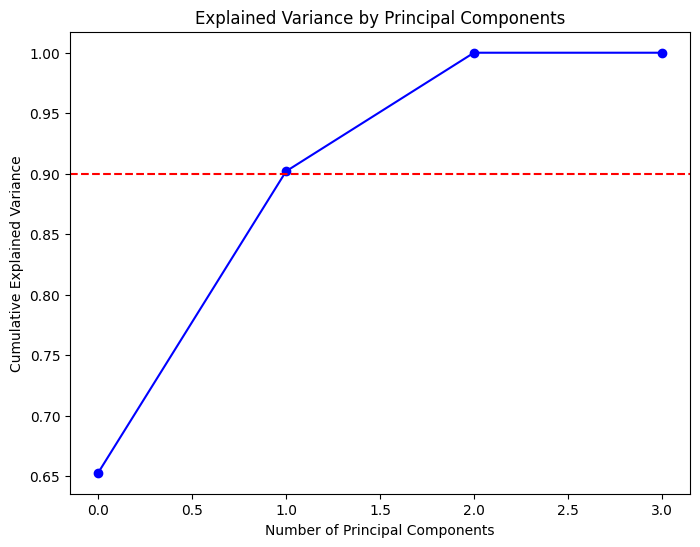

In [98]:
# Visualizing explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.show()

In [99]:
# Insights from PCA
pca_results = pd.DataFrame(pca.components_, columns=features)
print(pca_results)

   Targeted Productivity  Overtime  No. of Workers  Actual Productivity
0              -0.055007  0.523364        0.601278             0.601273
1              -0.997203  0.014365       -0.051855            -0.051877
2               0.050604  0.851988       -0.368458            -0.368503
3              -0.000014  0.000029       -0.707117             0.707096


3. Predictive Modeling and Time Series Analysis<br>
For reference, read about Time Series Forecasting with ARIMA from [Understanding Time Series Forecasting with ARIMA](https://medium.com/@mubarakdaha/understanding-time-series-forecasting-with-arima-59cd7140d6c3).<br><br>
(i) Build an ARIMA model to forecast the Actual Productivity for the next four quarters (four weeks).<br><br>
(ii) Evaluate the model using Mean Absolute Percentage Error (MAPE) and Mean Squared Error (MSE).<br><br>
(iii) Visualize the forecasted vs actual productivity values, and interpret the model’s accuracy.
<br><br>
Expectation: You are expected to create a clear and understandable chart that clearly shows the predicted productivity across the coming 4 quarters

In [100]:
df_funnel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1008 non-null   object 
 1   Quarter                1008 non-null   object 
 2   Department             1008 non-null   object 
 3   Targeted Productivity  1008 non-null   float64
 4   Overtime               1008 non-null   float64
 5   No. of Workers         1008 non-null   float64
 6   Actual Productivity    1008 non-null   float64
dtypes: float64(4), object(3)
memory usage: 63.0+ KB


In [101]:
# Convert 'Date' column to datetime and set it as index
df_funnel['Date'] = pd.to_datetime(df_funnel['Date'])
df_funnel.set_index('Date', inplace=True)

In [102]:
# Aggregate by quarter
df_quarterly = df_funnel['Actual Productivity'].resample('QE').mean()

In [103]:
# Train ARIMA model
model = ARIMA(df_quarterly, order=(1, 1, 1))
model_fit = model.fit()

In [104]:
# Forecast for the next 4 quarters
forecast_steps = 4
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(df_quarterly.index[-1] + pd.offsets.QuarterBegin(), periods=forecast_steps, freq='QE')

In [105]:
# Evaluate the model
y_true = df_quarterly[-forecast_steps:]
y_pred = model_fit.predict(start=len(df_quarterly)-forecast_steps, end=len(df_quarterly)-1)

In [106]:
mape = mean_absolute_percentage_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

In [107]:
print(f"MAPE: {mape}")
print(f"MSE: {mse}")

MAPE: 0.2660555356933091
MSE: 332.2042656948487


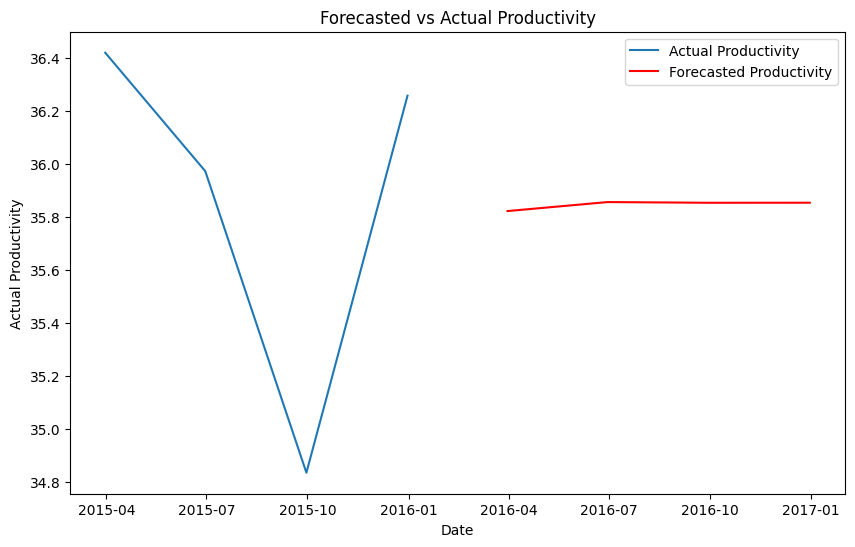

In [108]:
# Visualize the forecasted vs actual productivity
plt.figure(figsize=(10, 6))
plt.plot(df_quarterly, label='Actual Productivity')
plt.plot(forecast_index, forecast, label='Forecasted Productivity', color='r')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.title('Forecasted vs Actual Productivity')
plt.legend()
plt.show()

4. Clustering Analysis<br><br>
(i) Perform K-Means clustering on the Actual Productivity, Overtime, and No. of Workers.<br><br>
(ii) Determine the optimal number of clusters using the Elbow method.<br><br>
(iii) Visualize and interpret the clusters, focusing on how different segments of workers contribute to overall productivity.
<br><br>
Expectation: You are expected to create a visualisation that clearly explains the different segments' contribution. Add your interpretation as well.

In [109]:
# Clustering on Actual Productivity, Overtime, and No. of Workers
clustering_features = df_funnel[['Actual Productivity', 'Overtime', 'No. of Workers']]

In [110]:
# Standardize the data
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_features)


In [111]:
# Using the Elbow method to determine the optimal number of clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)  # Added random_state for reproducibility
    kmeans.fit(clustering_scaled)
    inertia.append(kmeans.inertia_)

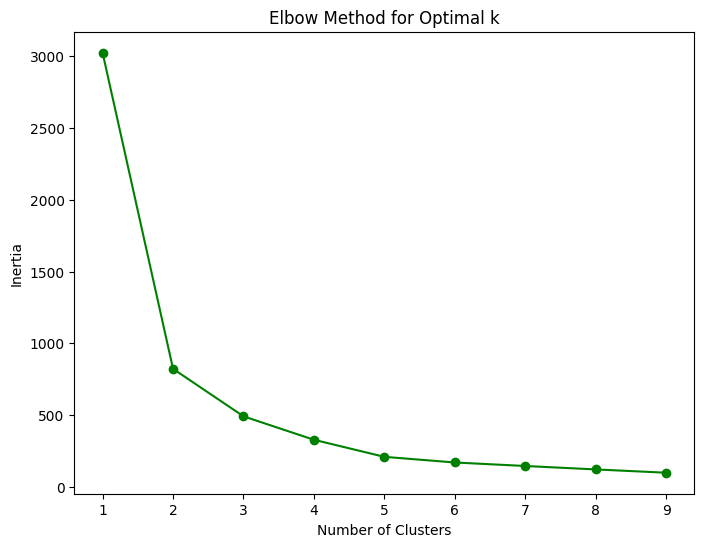

In [112]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='g')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [113]:
# Based on the Elbow method, let's choose k=3 for clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Added random_state for reproducibility
df_funnel['Cluster'] = kmeans.fit_predict(clustering_scaled)

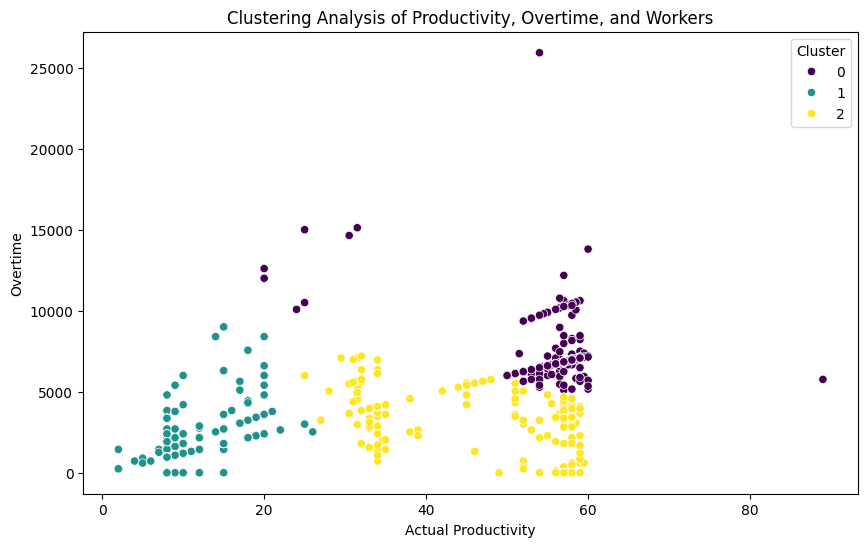

In [114]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Productivity', y='Overtime', hue='Cluster', data=df_funnel, palette='viridis')
plt.title('Clustering Analysis of Productivity, Overtime, and Workers')
plt.show()

5. Budget Allocation Strategy (Bonus)<br><br>
(i) The organization currently spends Rs. 8.4 lakh per quarter. Analyze the value brought by each department using Department Value = Actual Productivity / Department Quarterly Spend.<br><br>
(ii) Suggest a revised budget allocation strategy to maximize productivity, and justify your recommendation.<br><br>
(iii) Create a short PowerPoint presentation (3-4 slides) summarizing your analysis, the PCA findings, the forecasted productivity, and your budget allocation strategy.

In [115]:
# Calculating Department Value
department_value = df_funnel.groupby('Department').agg({
    'Actual Productivity': 'sum',
    'Quarter': 'nunique'
}).reset_index()

In [116]:
# Avoid division by zero if any department has zero quarters
department_value['Department Quarterly Spend'] = department_value['Quarter'].replace(0, np.nan).apply(lambda x: 8.4 / x)


In [117]:
# Ensure no NaN values in the 'Department Quarterly Spend' column for valid calculations
department_value['Department Quarterly Spend'] = department_value['Department Quarterly Spend'].fillna(0)

In [118]:
# Calculate the Department Value
department_value['Department Value'] = department_value['Actual Productivity'] / department_value['Department Quarterly Spend']

In [119]:
# Total value for allocation
total_value = department_value['Department Value'].sum()

In [120]:
# Avoid division by zero if total_value is zero
if total_value == 0:
    department_value['Suggested Budget Allocation'] = 0
else:
    department_value['Suggested Budget Allocation'] = (department_value['Department Value'] / total_value) * 8.4

In [121]:
print(department_value[['Department', 'Suggested Budget Allocation']])


  Department  Suggested Budget Allocation
0  Finishing                     0.978418
1     Sewing                     7.421582


---
# Section 2 - Anomaly detection

You are tasked with detecting fraudulent transactions from a large dataset of credit card transactions. The data contains both normal and fraudulent transactions, and your goal is to identify the anomalies (frauds) using an unsupervised learning approach.

Anomaly detection references
 - [Anomaly Detection in Machine Learning](https://www.shiksha.com/online-courses/articles/anomaly-detection/) - Shiksha Article
 - [Anomaly detection](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00320-x) - Springer Research paper

Import the `creditcard` sheet from the provided dataset. This dataset contains transactions made by credit cards in September 2013 by European cardholders. It presents transactions that occurred over two days, with 492 frauds out of 2,84,807 transactions.

1. Data Import and Exploration
- Import the creditcard.csv file into a dataframe named transactions.
- Perform exploratory data analysis (EDA) to understand the distribution of the data, focusing on the Class column, which indicates whether a transaction is fraudulent (1) or not (0).
- Visualize the distribution of transaction amounts for both fraudulent and non-fraudulent transactions.
<br><br>
Expectation: You are expected to present your interpretation of the dataset. Use visualisations to aid yourself.

In [124]:
import warnings
warnings.filterwarnings("ignore")


In [125]:
# Load the Excel file and extract the creditcard sheet
file_path = 'AssignmentData.xlsx'
df_transactions = pd.read_excel(file_path, sheet_name='creditcard')

In [126]:
# Exploratory Data Analysis (EDA)
print(df_transactions.head())
print(df_transactions.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [127]:
# Count the number of fraud and non-fraud transactions
print(df_transactions['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


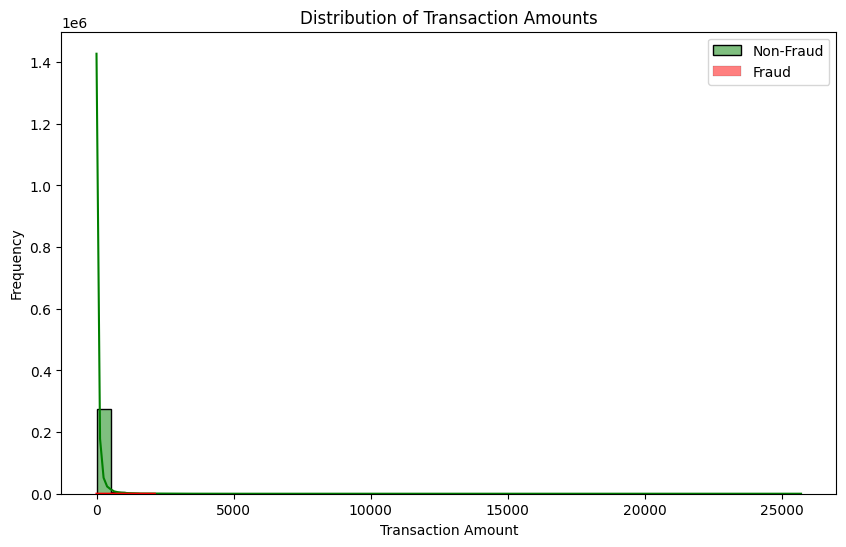

In [128]:
# Visualize the distribution of transaction amounts for both fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(df_transactions[df_transactions['Class'] == 0]['Amount'], bins=50, color='green', label='Non-Fraud', kde=True)
sns.histplot(df_transactions[df_transactions['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.legend()
plt.show()

In [129]:
# Convert object columns to numeric, coercing invalid parsing to NaN
object_columns = ['V2', 'V7', 'V9', 'V24']

for col in object_columns:
    df_transactions[col] = pd.to_numeric(df_transactions[col], errors='coerce')

In [130]:
# Check for missing values after conversion
print(df_transactions.isnull().sum())


Time      0
V1        0
V2        1
V3        0
V4        0
V5        0
V6        0
V7        2
V8        0
V9        1
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       1
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [131]:

# Handle missing values by filling with the median of the respective columns
for col in object_columns:
    df_transactions[col].fillna(df_transactions[col].median(), inplace=True)


In [132]:
# Verify no missing values remain
print(df_transactions.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


2. Feature Engineering
- The dataset includes 28 anonymized features (V1 to V28), along with Time and Amount.
- Perform feature scaling on the Amount and Time features. Justify your choice of scaling method (e.g., Min-Max scaling, Standardization).
- Consider dimensionality reduction (e.g., PCA) to visualize the data in two dimensions. Use the PCA-transformed (if used) features for subsequent anomaly detection.

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [134]:
# Feature Scaling: Standardization for 'Amount' and 'Time'
scaler = StandardScaler()
df_transactions[['Amount', 'Time']] = scaler.fit_transform(df_transactions[['Amount', 'Time']])


In [135]:
# Verify scaling
print(df_transactions[['Amount', 'Time']].head())


     Amount      Time
0  0.244964 -1.996583
1 -0.342475 -1.996583
2  1.160686 -1.996562
3  0.140534 -1.996562
4 -0.073403 -1.996541


In [136]:
# Applying PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_transactions.drop(columns=['Class']))


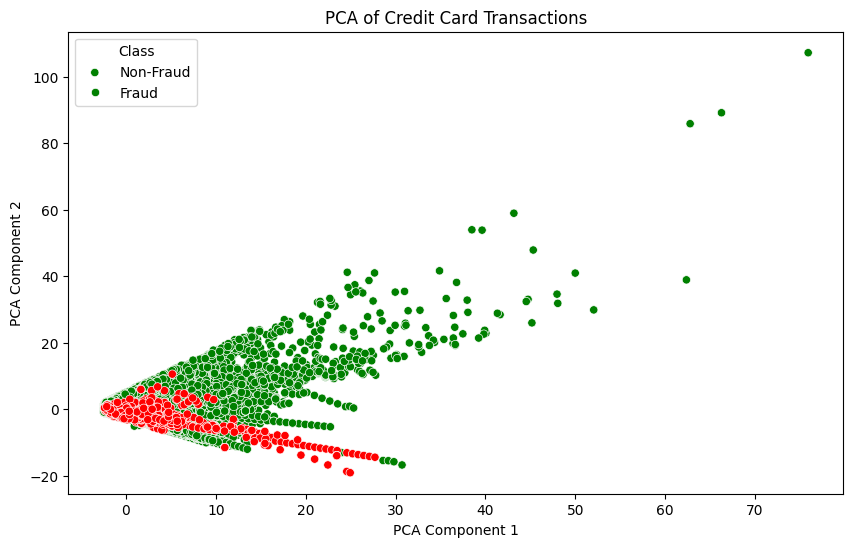

In [137]:
# Visualize the PCA-transformed data with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=df_transactions['Class'], palette=['green', 'red'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Credit Card Transactions')
plt.legend(title='Class', loc='best', labels=['Non-Fraud', 'Fraud'])
plt.show()


In [138]:
# Check explained variance to ensure meaningful transformation
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by first 2 components: {explained_variance}')


Explained variance by first 2 components: [0.12088237 0.09654262]


3. Anomaly Detection Model

- Implement an anomaly detection model using any two of the following methods:
 - Isolation Forest
 - Local Outlier Factor (LOF)
 - Autoencoders (for deep learning)
- Train the model on the entire dataset, treating the majority class (`Class = 0`) as normal transactions and the minority class (`Class = 1`) as anomalies.
- Evaluate the model’s performance using Precision, Recall, F1-Score, and ROC-AUC. Discuss the trade-offs in detecting frauds (e.g., false positives vs. false negatives).
<br><br>
Expectation: The evaluation metrics should be presented clearly. Present your views on the model, and what it means.

In [139]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [140]:
# Features to be used for training (all features except 'Class')
X = df_transactions.drop(columns=['Class'])
y = df_transactions['Class']

In [141]:
# Model 1: Isolation Forest
iso_forest = IsolationForest(contamination=0.0017, random_state=42)  # 0.0017 is the approximate fraud ratio
iso_forest.fit(X)

IsolationForest(contamination=0.0017, random_state=42)

In [142]:
# Predict anomalies: -1 indicates anomaly, 1 indicates normal
y_pred_iso = iso_forest.predict(X)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]  # Convert to 1 for fraud, 0 for non-fraud


In [143]:
# Evaluate Isolation Forest
precision_iso = precision_score(y, y_pred_iso)
recall_iso = recall_score(y, y_pred_iso)
f1_iso = f1_score(y, y_pred_iso)
roc_auc_iso = roc_auc_score(y, y_pred_iso)

In [144]:
print(f"Isolation Forest - Precision: {precision_iso}, Recall: {recall_iso}, F1-Score: {f1_iso}, ROC-AUC: {roc_auc_iso}")


Isolation Forest - Precision: 0.2309278350515464, Recall: 0.22764227642276422, F1-Score: 0.2292732855680655, ROC-AUC: 0.6131651756346627


In [145]:
# Model 2: Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.0017)  # 0.0017 is the approximate fraud ratio
y_pred_lof = lof.fit_predict(X)
y_pred_lof = [1 if x == -1 else 0 for x in y_pred_lof]  # Convert to 1 for fraud, 0 for non-fraud

In [146]:
# Evaluate Local Outlier Factor
precision_lof = precision_score(y, y_pred_lof)
recall_lof = recall_score(y, y_pred_lof)
f1_lof = f1_score(y, y_pred_lof)
roc_auc_lof = roc_auc_score(y, y_pred_lof)

In [147]:
print(f"Local Outlier Factor - Precision: {precision_lof}, Recall: {recall_lof}, F1-Score: {f1_lof}, ROC-AUC: {roc_auc_lof}")


Local Outlier Factor - Precision: 0.0, Recall: 0.0, F1-Score: 0.0, ROC-AUC: 0.49914707278898407


4. Visualizing Anomalies

  Create a scatter plot of the two most significant features (after PCA or from the original features) with points colored based on whether they were classified as normal or fraudulent.

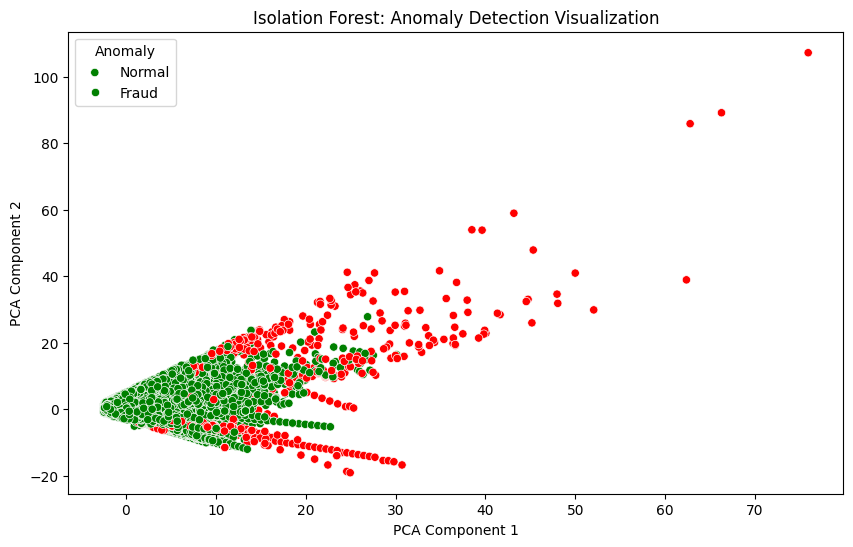

In [148]:
# Visualizing the anomalies detected by Isolation Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=y_pred_iso, palette=['green', 'red'], legend='full')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Isolation Forest: Anomaly Detection Visualization')
plt.legend(title='Anomaly', loc='best', labels=['Normal', 'Fraud'])
plt.show()

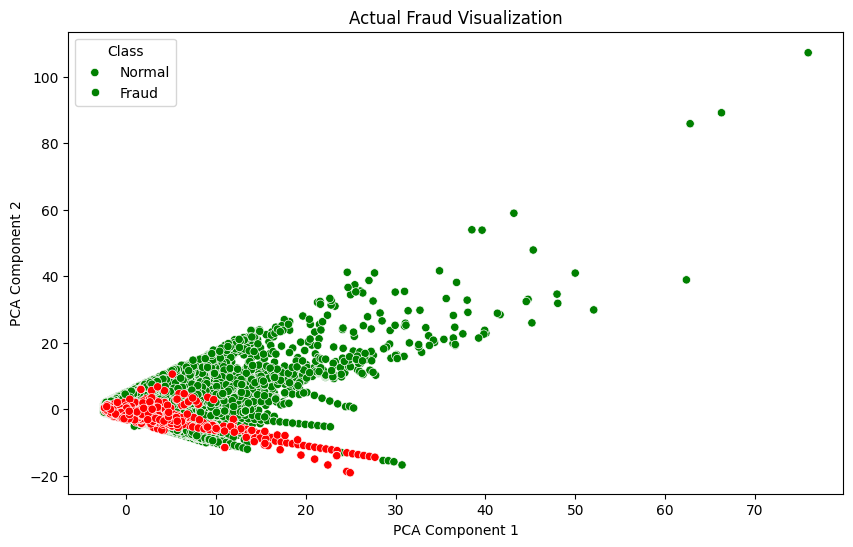

In [149]:
# Visualizing the actual frauds (based on the true labels)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=y, palette=['green', 'red'], legend='full')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Actual Fraud Visualization')
plt.legend(title='Class', loc='best', labels=['Normal', 'Fraud'])
plt.show()

5. Write a function that accepts a new dataset of credit card transactions and the trained anomaly detection model, returning a list of transactions classified as fraudulent.

  Develop a simple Streamlit app (you can follow this [tutorial](https://youtu.be/sogNluduBQQ?si=wA5a2wVh4bqeAtmi)) that allows users to upload a new set of credit card transactions, runs the anomaly detection model, and displays the results, including the visualizations of detected anomalies. For this, use the `creditcard_test` sheet provided in the data file. Finally, host this app on Streamlit Community Cloud using this [tutorial](https://blog.streamlit.io/host-your-streamlit-app-for-free/).
  <br><br> Provide the link to the site as a text cell or comment<br>  
    **Note**: You get bonus points for a neater and more presentable app.


In [150]:
def detect_anomalies(new_data, model, scaler):
    # Clean column names
    new_data.columns = new_data.columns.str.strip()  # Remove any leading/trailing spaces

    # Ensure required columns are present
    required_columns = ['Amount', 'Time']
    missing_columns = [col for col in required_columns if col not in new_data.columns]
    if missing_columns:
        raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")

    # Preprocess the new data (e.g., scaling Amount and Time)
    new_data = new_data[required_columns]  # Select only the required columns
    new_data[['Amount', 'Time']] = scaler.transform(new_data[['Amount', 'Time']])
    
    # Predict anomalies using the trained model
    anomalies = model.predict(new_data)
    
    # Convert -1 to 1 (fraud) and 1 to 0 (non-fraud)
    anomalies = [1 if x == -1 else 0 for x in anomalies]
    
    # Add the anomalies as a new column in the dataset
    new_data['Anomaly'] = anomalies
    
    return new_data


In [151]:
import pickle

# Save the trained Isolation Forest model
with open('iso_forest_model.pkl', 'wb') as model_file:
    pickle.dump(iso_forest, model_file)

# Save the scaler (if you have one)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [152]:
df_transactions.to_csv('test_data.csv', index=False)
